#📌 Extracción

In [4]:
import requests
import pandas as pd

#Extrae los datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()


#🔧 Transformación

In [5]:
#Normaliza
from pandas import json_normalize

# Normaliza las columnas anidadas
df = json_normalize(data, sep='_')


# Convertir columnas numéricas
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')
df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype('category')

#trabajamos con el diccionario
df.rename(columns={
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'Charges.Monthly',
    'account_Charges_Total': 'Charges.Total'
}, inplace=True)


#Revisar
print(df.head())

   customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female             0     Yes        Yes       9   
1  0003-MKNFE    No    Male             0      No         No       9   
2  0004-TLHLJ   Yes    Male             0      No         No       4   
3  0011-IGKFF   Yes    Male             1     Yes         No      13   
4  0013-EXCHZ   Yes  Female             1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1             

#📊 Carga

In [6]:
df.to_csv('telecom_data_limpio.csv', index=False)
df.to_json('telecom_data_limpio.json', orient='records', indent=4)

#Análisis posibles

In [7]:
# Vista general
df.info()

# Estadísticas generales numéricas
df.describe()

# Estadísticas categóricas
df.describe(include='object')  # o include='all'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   object  
 2   gender            7267 non-null   object  
 3   SeniorCitizen     7267 non-null   category
 4   Partner           7267 non-null   object  
 5   Dependents        7267 non-null   object  
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   object  
 8   MultipleLines     7267 non-null   object  
 9   InternetService   7267 non-null   object  
 10  OnlineSecurity    7267 non-null   object  
 11  OnlineBackup      7267 non-null   object  
 12  DeviceProtection  7267 non-null   object  
 13  TechSupport       7267 non-null   object  
 14  StreamingTV       7267 non-null   object  
 15  StreamingMovies   7267 non-null   object  
 16  Contract          7267 n

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445


<Axes: >

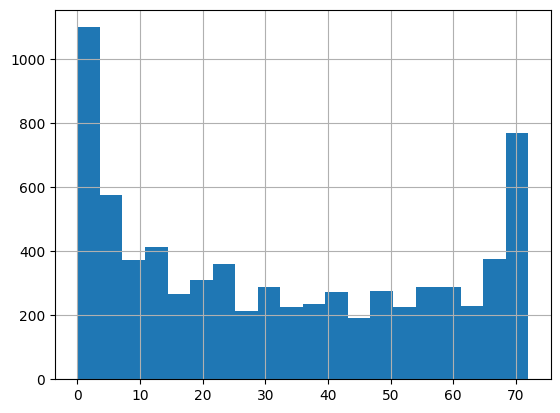

In [8]:
#Distribución de churn
df['Churn'].value_counts(normalize=True)

# Distribución de antigüedad
df['tenure'].hist(bins=20)

In [10]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')
pd.crosstab(df['InternetService'], df['Churn'], normalize='index')


Churn,,No,Yes
InternetService,,,
DSL,0.026929,0.788585,0.184486
Fiber optic,0.031895,0.562539,0.405566
No,0.034788,0.893738,0.071474


In [16]:
# Promedio de cargos mensuales por churn
df.groupby('Churn')['Charges.Monthly'].mean()

# Promedio de tenure por churn
df.groupby('Churn')['tenure'].mean()

df.groupby('Churn')[['Charges.Monthly', 'Charges.Total']].mean()

df.isnull().sum()

# ¿Cargos totales con valores nulos?
df[df['Charges.Total'].isnull()]




,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


#📄Informe final

<Axes: xlabel='tenure', ylabel='Count'>

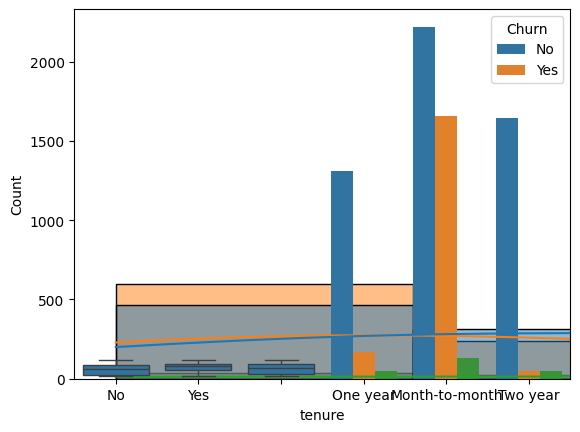

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de tenure por Churn
sns.histplot(data=df, x='tenure', hue='Churn', bins=20, kde=True)

# Boxplot de cargos mensuales por churn
sns.boxplot(x='Churn', y='Charges.Monthly', data=df)

# Countplot de contrato por churn
sns.countplot(data=df, x='Contract', hue='Churn')